In [349]:
# Importing necessary libraries
##!pip install -q pandas seaborn matplotlib
##!pip install -q wordcloud
##!pip install -q textblob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import string
import re
from textblob import TextBlob

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vinci\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vinci\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [350]:
# Loading the dataset
df = pd.read_excel("dataset_free-tiktok.xlsx") 
df.head()

,authorMeta/avatar,authorMeta/digg,authorMeta/fans,authorMeta/following,authorMeta/heart,authorMeta/id,authorMeta/name,authorMeta/nickName,authorMeta/signature,authorMeta/verified,...,musicMeta/playUrl,playCount,searchHashtag/name,searchHashtag/views,shareCount,text,videoMeta/duration,videoMeta/height,videoMeta/width,webVideoUrl
0,https://p16-sign-sg.tiktokcdn.com/aweme/720x72...,420,13200000,28,150400000,6713126981665686530,miso_ara,미소아라 Miso_Ara,soonent@soon-ent.co.kr\n.\n Miso Ara IG,True,...,https://sf16-ies-music-sg.tiktokcdn.com/obj/ti...,200600000,meme,556B,377700,Ara Woah #woah #woahchallenge #foryou #fyp...,17,1280,720,https://www.tiktok.com/@miso_ara/video/6797294...
1,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,10800,1300000,182,35100000,6929583089811522566,crinka11,Chris Rinker,insta: chrisrinker73,False,...,https://sf16-ies-music-va.tiktokcdn.com/obj/mu...,79600000,meme,556B,205400,#fyp #meme #funny #meme #vine,11,1024,576,https://www.tiktok.com/@crinka11/video/6958603...
2,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,251,696800,42,15900000,7083448802635596842,iampets_com,IamPéts,"Pet supplies, toys online store. All products ...",False,...,https://sf16-ies-music-va.tiktokcdn.com/obj/ie...,106100000,meme,556B,323000,The end #funny #funnyvideos #animals #haha #me...,25,1024,576,https://www.tiktok.com/@iampets_com/video/7083...
3,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,218,510200,56,32100000,7087287470497645573,dailydosevideos_,dailydosevideos,Daily dose of videos/memes \nsupport the page ...,False,...,https://sf16-ies-music-va.tiktokcdn.com/obj/mu...,72500000,meme,556B,133400,Try not to laugh hard #meme #trynottolaughtik...,62,1024,576,https://www.tiktok.com/@dailydosevideos_/video...
4,https://p19-sign.tiktokcdn-us.com/tos-useast5-...,47600,3300000,690,137300000,6621521206107717638,jakeypoov,Jake Sherman,-.-- --- ..- .-. . .-.. --- ...- . -.. ...,True,...,https://sf16-ies-music-va.tiktokcdn.com/obj/mu...,62700000,meme,556B,252900,HE DIDN’T HAVE HIS MASK ON @abbysherm (Follow...,36,1024,576,https://www.tiktok.com/@jakeypoov/video/681538...


In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 52 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   authorMeta/avatar                       1200 non-null   object 
 1   authorMeta/digg                         1200 non-null   int64  
 2   authorMeta/fans                         1200 non-null   int64  
 3   authorMeta/following                    1200 non-null   int64  
 4   authorMeta/heart                        1200 non-null   int64  
 5   authorMeta/id                           1200 non-null   int64  
 6   authorMeta/name                         1200 non-null   object 
 7   authorMeta/nickName                     1178 non-null   object 
 8   authorMeta/signature                    1142 non-null   object 
 9   authorMeta/verified                     1200 non-null   bool   
 10  authorMeta/video                        1200 non-null   int6

In [352]:
# Checking the missing values to see which columns we will use for the analysis
missing_values = df.isnull().sum()
missing_values

authorMeta/avatar                            0
authorMeta/digg                              0
authorMeta/fans                              0
authorMeta/following                         0
authorMeta/heart                             0
authorMeta/id                                0
authorMeta/name                              0
authorMeta/nickName                         22
authorMeta/signature                        58
authorMeta/verified                          0
authorMeta/video                             0
commentCount                                 0
createTime                                   0
createTimeISO                                0
diggCount                                    0
downloaded                                   0
effectStickers/0/ID                       1120
effectStickers/0/name                     1120
effectStickers/0/stickerStats/useCount    1182
effectStickers/1/ID                       1184
effectStickers/1/name                     1184
effectSticker

In [353]:
# There are columns that have a lot of missing data, so we decided to drop them alongside other columns 
# that won't be relevant to our analysis.
columns_to_drop = [
    'authorMeta/avatar', 
    'authorMeta/digg', 
    'createTime', 
    'diggCount', 
    'effectStickers/0/ID', 
    'effectStickers/0/name', 
    'effectStickers/0/stickerStats/useCount', 
    'effectStickers/1/ID', 
    'effectStickers/1/name', 
    'effectStickers/1/stickerStats/useCount', 
    'hashtags/0/cover', 
    'hashtags/1/cover', 
    'mentions/3', 
    'mentions/4', 
    'mentions/5', 
    'musicMeta/musicAlbum', 
    'videoMeta/height', 
    'videoMeta/width',
    'id', 
    'authorMeta/id',
    'downloaded',
    'hashtags/1/id',
    'mediaUrls/0',
    'musicMeta/playUrl',
    'webVideoUrl'
]

df = df.drop(columns=columns_to_drop)
df.head()


,authorMeta/fans,authorMeta/following,authorMeta/heart,authorMeta/name,authorMeta/nickName,authorMeta/signature,authorMeta/verified,authorMeta/video,commentCount,createTimeISO,...,mentions/2,musicMeta/musicAuthor,musicMeta/musicName,musicMeta/musicOriginal,playCount,searchHashtag/name,searchHashtag/views,shareCount,text,videoMeta/duration
0,13200000,28,150400000,miso_ara,미소아라 Miso_Ara,soonent@soon-ent.co.kr\n.\n Miso Ara IG,True,303,66000,2020-02-25T12:11:06.000Z,...,NaN,미소아라 Miso_Ara,오리지널 사운드 - Miso_Ara,True,200600000,meme,556B,377700,Ara Woah #woah #woahchallenge #foryou #fyp...,17
1,1300000,182,35100000,crinka11,Chris Rinker,insta: chrisrinker73,False,518,154100,2021-05-05T00:56:03.000Z,...,NaN,Chris Rinker,original sound,True,79600000,meme,556B,205400,#fyp #meme #funny #meme #vine,11
2,696800,42,15900000,iampets_com,IamPéts,"Pet supplies, toys online store. All products ...",False,90,55300,2022-04-07T14:05:06.000Z,...,NaN,IamPéts,nhạc nền,True,106100000,meme,556B,323000,The end #funny #funnyvideos #animals #haha #me...,25
3,510200,56,32100000,dailydosevideos_,dailydosevideos,Daily dose of videos/memes \nsupport the page ...,False,84,70600,2022-05-11T13:15:07.000Z,...,NaN,dailydosevideos,original sound,True,72500000,meme,556B,133400,Try not to laugh hard #meme #trynottolaughtik...,62
4,3300000,690,137300000,jakeypoov,Jake Sherman,-.-- --- ..- .-. . .-.. --- ...- . -.. ...,True,247,35500,2020-04-14T02:04:47.000Z,...,NaN,Jake Sherman,original sound,True,62700000,meme,556B,252900,HE DIDN’T HAVE HIS MASK ON @abbysherm (Follow...,36


In [354]:
# Converting the searchHashtag/views column into number format to be able to analyze it
def convert_to_numeric(value):
    if "B" in value:
        value = float(value.strip("B")) * 1_000_000_000
    elif "M" in value:
        value = float(value.strip("M")) * 1_000_000
    else:
        value = float(value)
    return value

df['searchHashtag/views'] = df['searchHashtag/views'].apply(convert_to_numeric)

In [355]:
# Changing boolean columns into 1 and 0 
df['authorMeta/verified'] = df['authorMeta/verified'].astype(int)
df['musicMeta/musicOriginal'] = df['musicMeta/musicOriginal'].astype(int)

In [356]:
# Changing mention columns data to 1 and 0
df['mentions/0'] = df['mentions/0'].fillna(0).apply(lambda x: 1 if x != 0 else 0)
df['mentions/1'] = df['mentions/1'].fillna(0).apply(lambda x: 1 if x != 0 else 0)
df['mentions/2'] = df['mentions/2'].fillna(0).apply(lambda x: 1 if x != 0 else 0)

In [357]:
# Verifying if the boolean and mention columns were converted
specific_columns = ['authorMeta/verified','musicMeta/musicOriginal','mentions/0','mentions/1','mentions/2']
head_data = df[specific_columns].head()
print(head_data)

   authorMeta/verified  musicMeta/musicOriginal  mentions/0  mentions/1  \
0                    1                        1           0           0   
1                    0                        1           0           0   
2                    0                        1           0           0   
3                    0                        1           0           0   
4                    1                        1           1           0   

   mentions/2  
0           0  
1           0  
2           0  
3           0  
4           0  


In [358]:
# Summary statistics of the data now cleaned
df.describe()

,authorMeta/fans,authorMeta/following,authorMeta/heart,authorMeta/verified,authorMeta/video,commentCount,hashtags/0/id,mentions/0,mentions/1,mentions/2,musicMeta/musicOriginal,playCount,searchHashtag/views,shareCount,videoMeta/duration
count,1.200000e+03,1200.000000,1.200000e+03,1200.000000,1200.000000,1200.000000,1.198000e+03,1200.000000,1200.000000,1200.000000,1200.000000,1.200000e+03,1.200000e+03,1.200000e+03,1200.000000
mean,7.124049e+06,508.820000,1.475789e+08,0.272500,618.774167,53554.415000,2.975124e+16,0.193333,0.037500,0.010833,0.724167,5.468718e+07,4.512025e+11,1.569660e+05,29.741667
std,2.096570e+07,1237.753254,3.599765e+08,0.445431,1598.081980,74139.653978,4.555694e+17,0.395077,0.190063,0.103561,0.447120,5.784957e+07,1.362689e+12,2.546967e+05,28.546173
min,4.180000e+02,0.000000,6.064000e+03,0.000000,1.000000,0.000000,5.690000e+02,0.000000,0.000000,0.000000,0.000000,9.225000e+03,2.200000e+06,0.000000e+00,0.000000
25%,2.792000e+05,38.000000,8.200000e+06,0.000000,113.000000,8459.000000,1.812100e+04,0.000000,0.000000,0.000000,0.000000,1.447500e+07,8.350000e+09,1.717500e+04,13.000000
50%,1.300000e+06,131.000000,2.620000e+07,0.000000,315.500000,29500.000000,1.633230e+05,0.000000,0.000000,0.000000,1.000000,3.690000e+07,8.570000e+10,6.515000e+04,19.000000
75%,4.525000e+06,403.250000,1.074000e+08,1.000000,754.000000,70500.000000,1.396414e+07,0.000000,0.000000,0.000000,1.000000,7.085000e+07,2.884250e+11,1.971750e+05,41.000000
max,1.475000e+08,10000.000000,2.300000e+09,1.000000,34500.000000,715500.000000,7.120048e+18,1.000000,1.000000,1.000000,1.000000,3.548000e+08,9.793300e+12,2.800000e+06,356.000000


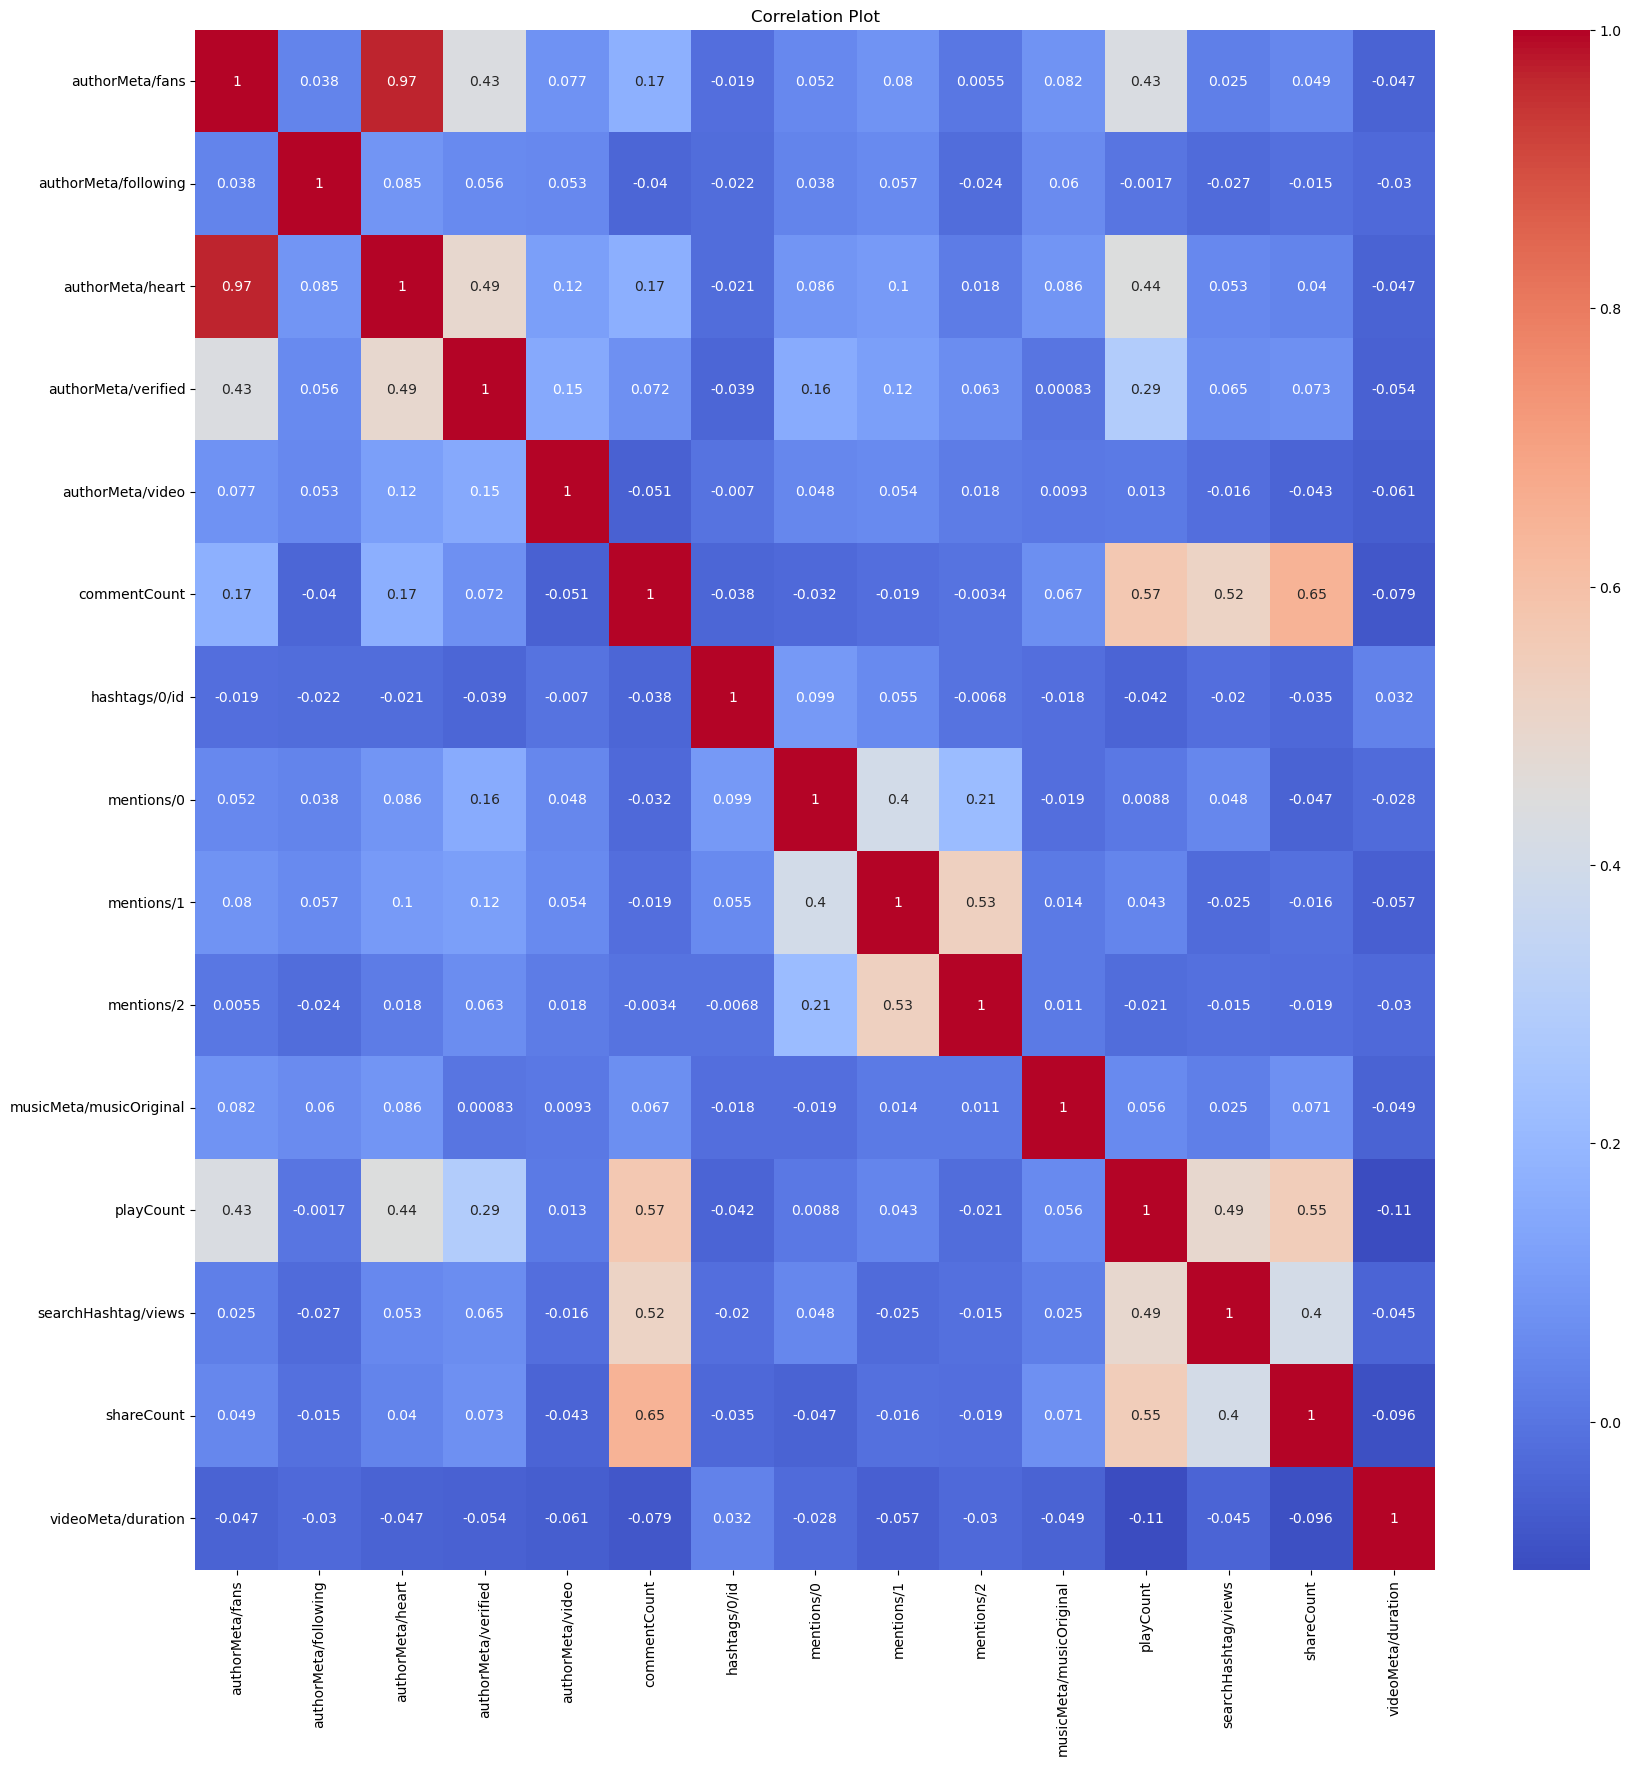

In [359]:
# Creating correlation plot for all the numerical values
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Plot')
plt.show()


Hypothesis 1

The type of music used in a TikTok video (as represented by the 'musicMeta/musicName' column) is significantly associated with the number of likes (hearts) the video receives.

In [360]:
# Creating bins for 'authotMeta/heart' (likes) based on its distribution
likes_bins = [-np.inf, df['authorMeta/heart'].quantile(0.25), df['authorMeta/heart'].quantile(0.75), np.inf]
likes_labels = ['low', 'medium', 'high']
df['likes_category'] = pd.cut(df['authorMeta/heart'], bins = likes_bins, labels = likes_labels)
# Creating a contingency table 
contingency_table = pd.crosstab(df['musicMeta/musicName'], df['likes_category'])
# Performing Chi-square test of independece to see association between variables
chi2, p, dof, expected = chi2_contingency(contingency_table)
chi2, p

(1093.4226162290481, 1.3803283537242879e-05)

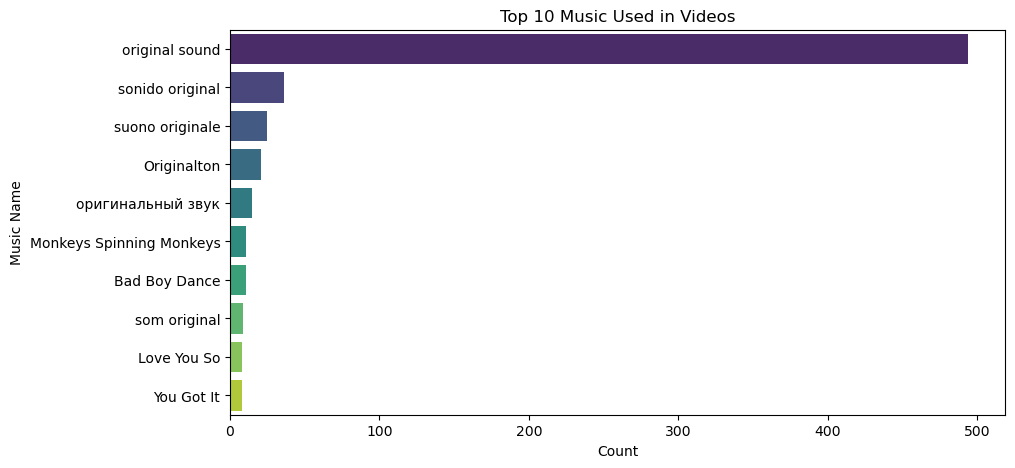

In [361]:
# Analyzing the 'musicName' column
music_counts = df['musicMeta/musicName'].value_counts().head(10)
plt.figure(figsize = (10,5))
sns.barplot(y = music_counts.index, x = music_counts.values, palette = 'viridis')
plt.xlabel('Count')
plt.ylabel('Music Name')
plt.title('Top 10 Music Used in Videos')
plt.show()

Hypothesis 2

The number of fans a user has is positively correlated with the number of hearts their videos receive

In [362]:
# Performing Pearson correlation test
correlation, p_value = pearsonr(df['authorMeta/fans'], df['authorMeta/heart'])
correlation, p_value

(0.9666843550651686, 0.0)

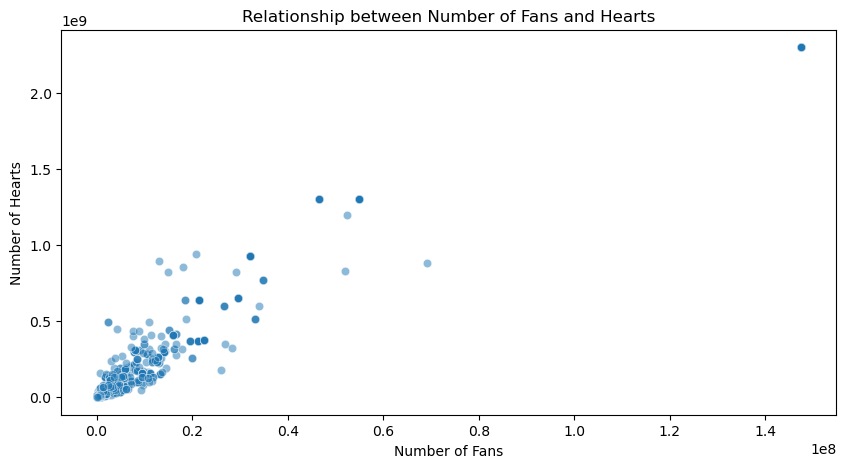

In [363]:
# Creating scatter plot of 'authorMeta/fans' and 'authorMeta/heart'
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'authorMeta/fans', y = 'authorMeta/heart', data = df, alpha = 0.5)
plt.xlabel('Number of Fans')
plt.ylabel('Number of Hearts')
plt.title('Relationship between Number of Fans and Hearts')
plt.show()

HYPOTHESIS 3

Verified authors (authorMeta/verified) receive more views (playCount) than non-verified authors

In [364]:
# Performing t-test
group1 = df[df['authorMeta/verified'] == True]['playCount']
group2 = df[df['authorMeta/verified'] == False]['playCount']
t_statistic, p_value = ttest_ind(group1, group2, equal_var = False)
t_statistic, p_value

(8.961514027035058, 8.521384539642615e-18)

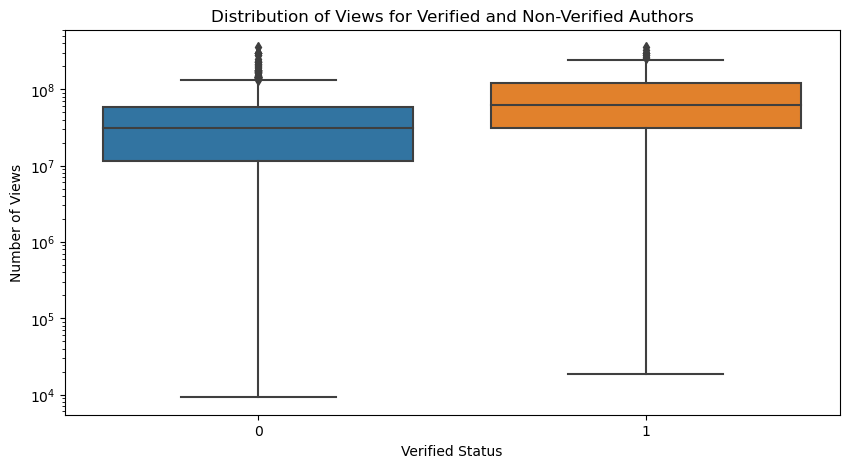

In [365]:
# Boxplot of 'playCount' for verified and non-verified authors to visualize the results above
plt.figure(figsize = (10,5))
sns.boxplot(x = 'authorMeta/verified', y = 'playCount', data = df)
plt.xlabel('Verified Status')
plt.ylabel('Number of Views')
plt.title('Distribution of Views for Verified and Non-Verified Authors')
plt.yscale('log')
plt.show()

HYPOTHESIS 4

The content of the video description (text) and the author's signature (authorMeta/signature) are associated with the themes or topics prevalent in the TikTok videos

In [366]:
def preprocess_text(text):
    # Checking if the input is a string
    if isinstance(text, str):
        # Converting to lowercase
        text = text.lower()
        # Removing punctuation
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
        # Removing non-alphabetic characters
        text = re.sub('\W', ' ', text)
        # Removing long strings of whitespace
        text = re.sub('\s+', ' ', text).strip()
        # Tokenizing the text
        words = word_tokenize(text)
        # Removing stopwords
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word not in stop_words]
        return ' '.join(words)
    else:
        # Asking to return an empty string if the input is not a string
        return ''

In [367]:
# Applying the preprocessing function to the 'text' and 'authorMeta/signature' columns
# So it can be possible to analyze the text with word cloud
df['cleaned_text'] = df['text'].apply(preprocess_text)
df['cleaned_signature'] = df['authorMeta/signature'].apply(preprocess_text)
df.head()

,authorMeta/fans,authorMeta/following,authorMeta/heart,authorMeta/name,authorMeta/nickName,authorMeta/signature,authorMeta/verified,authorMeta/video,commentCount,createTimeISO,...,musicMeta/musicOriginal,playCount,searchHashtag/name,searchHashtag/views,shareCount,text,videoMeta/duration,likes_category,cleaned_text,cleaned_signature
0,13200000,28,150400000,miso_ara,미소아라 Miso_Ara,soonent@soon-ent.co.kr\n.\n Miso Ara IG,1,303,66000,2020-02-25T12:11:06.000Z,...,1,200600000,meme,5.560000e+11,377700,Ara Woah #woah #woahchallenge #foryou #fyp...,17,high,ara woah woah woahchallenge foryou fyp meme 이아...,soonentsoonentcokr miso ara ig
1,1300000,182,35100000,crinka11,Chris Rinker,insta: chrisrinker73,0,518,154100,2021-05-05T00:56:03.000Z,...,1,79600000,meme,5.560000e+11,205400,#fyp #meme #funny #meme #vine,11,medium,fyp meme funny meme vine,insta chrisrinker73
2,696800,42,15900000,iampets_com,IamPéts,"Pet supplies, toys online store. All products ...",0,90,55300,2022-04-07T14:05:06.000Z,...,1,106100000,meme,5.560000e+11,323000,The end #funny #funnyvideos #animals #haha #me...,25,medium,end funny funnyvideos animals haha meme dog ca...,pet supplies toys online store products video ...
3,510200,56,32100000,dailydosevideos_,dailydosevideos,Daily dose of videos/memes \nsupport the page ...,0,84,70600,2022-05-11T13:15:07.000Z,...,1,72500000,meme,5.560000e+11,133400,Try not to laugh hard #meme #trynottolaughtik...,62,medium,try laugh hard meme trynottolaughtiktoktv,daily dose videosmemes support page want
4,3300000,690,137300000,jakeypoov,Jake Sherman,-.-- --- ..- .-. . .-.. --- ...- . -.. ...,1,247,35500,2020-04-14T02:04:47.000Z,...,1,62700000,meme,5.560000e+11,252900,HE DIDN’T HAVE HIS MASK ON @abbysherm (Follow...,36,high,mask abbysherm follow insta jakeypoov fyp vent...,im vent guy


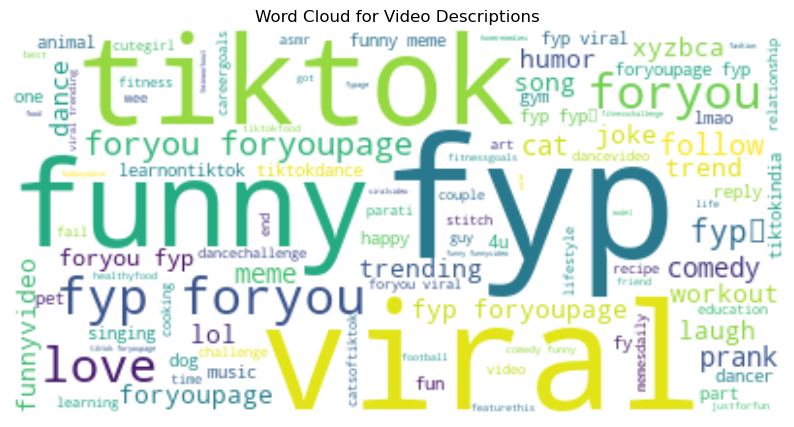

In [368]:
# Creating a word cloud for the 'cleaned_text' column
wordcloud_text = WordCloud(background_color = 'white', max_words = 100).generate(' '.join(df['cleaned_text']))

# Displaying the word cloud
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud_text, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud for Video Descriptions')
plt.show()

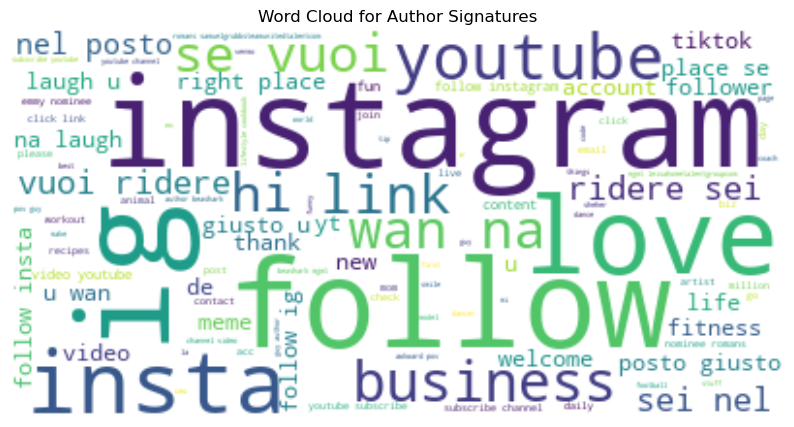

In [369]:
# Creating now a word cloud for the 'cleaned_signature' column
wordcloud_signature = WordCloud(background_color = 'white', max_words = 100).generate(' '.join(df['cleaned_signature']))

# Displaying the word cloud for the signatures
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud_signature, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud for Author Signatures')
plt.show()

SENTIMENT ANALYSIS

In [370]:
# Function to get sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment < 0:
        return 0  # Negative sentiment
    else:
        return 1  # Positive sentiment

# Applying the sentiment analysis and assigning values to a new column called 'sentiment'
df['sentiment'] = df['cleaned_text'].apply(get_sentiment)
selected_columns = df.loc[:,['cleaned_text','sentiment']]
selected_columns.head()

,cleaned_text,sentiment
0,ara woah woah woahchallenge foryou fyp meme 이아...,1
1,fyp meme funny meme vine,1
2,end funny funnyvideos animals haha meme dog ca...,1
3,try laugh hard meme trynottolaughtiktoktv,1
4,mask abbysherm follow insta jakeypoov fyp vent...,1


In [371]:
# Displaying text with negative sentiment to be sure the analysis worked
selected_rows = df.loc[df['sentiment'] == 0, ['cleaned_text', 'sentiment']]
selected_rows.head()

,cleaned_text,sentiment
11,jimmy fallon sooo suspicious like wrong jimmat...,0
16,wee foryou foryoupage tiktok wee funny dog ani...,0
44,stitch gavinfujjj unreal stitch fypシ wtf jokes...,0
48,simple mingweirocks meme fail funny foryou viral,0
49,nobody got hurt everything protected danger vi...,0


In [372]:
# Now same process as before but with the 'cleaned_signature' column
# Function to get sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment < 0:
        return 0  # Negative sentiment
    else:
        return 1  # Positive sentiment

# Applying sentiment analysis and assigning values to a new column 'sentiment2'
df['sentiment2'] = df['cleaned_signature'].apply(get_sentiment)
selected_columns2 = df.loc[:,['cleaned_signature','sentiment2']]
selected_columns2.head()

,cleaned_signature,sentiment2
0,soonentsoonentcokr miso ara ig,1
1,insta chrisrinker73,1
2,pet supplies toys online store products video ...,1
3,daily dose videosmemes support page want,1
4,im vent guy,1


In [373]:
# Displaying signatures with negative sentiment
selected_rows2 = df.loc[df['sentiment2'] == 0, ['cleaned_signature', 'sentiment2']]
selected_rows2.head()

,cleaned_signature,sentiment2
18,average trash panda boujee life bandito,0
56,father fighter artist idiot,0
93,hi likes editing random videosnot minebgm well...,0
97,paranormal princess see dead people,0
120,awkward pov guy author beashark mgmt leisahome...,0


In [374]:
# Calculating the average 'playCount' and 'hearts' for each sentiment category of the text (video description)
sentiment_metrics = df.groupby('sentiment')[['playCount', 'authorMeta/heart']].mean()

print(sentiment_metrics)

              playCount  authorMeta/heart
sentiment                                
0          5.308806e+07      1.332072e+08
1          5.485668e+07      1.491022e+08


In [375]:
# Calculating the average 'playCount' and 'hearts' for each sentiment category of the signature (bio description)
sentiment2_metrics = df.groupby('sentiment2')[['playCount', 'authorMeta/heart']].mean()

print(sentiment2_metrics)

               playCount  authorMeta/heart
sentiment2                                
0           3.720769e+07      4.938582e+07
1           5.552681e+07      1.522956e+08
